# Usage Accumulation

## introduction

#### The purpose of this script is to get usage accumulation

In [1]:
%run include/required_libs.py
%matplotlib inline  
cycles = list(range(2013,2019))

In [ ]:
fig, ax = plt.subplots()
import numpy as np
import matplotlib.pylab as pl

for i in cycles:
    su = pd.read_csv('rawdata/usage_by_cycles_group_'+ str(i) + '.csv')
    su = su[['cycle','account','su']]  # only need these columns
    su = su.groupby(['account'])['su'].sum().to_frame()
    
    su = su.sort_values('su',ascending = False)
    su[i] = su['su']/sum(su['su']) 
    
    su['por'] = 1/ len(su) 
    su['Fraction of Account'] = su['por'].cumsum()
    su.set_index('Fraction of Account',inplace=True)
    ax = su[i].cumsum().plot(color=plt.cm.get_cmap('seismic')((i-2013)/5))

    
plt.ylabel('Fraction of Usage', fontsize=18)                             ## label size
plt.xlabel('Fraction of Account', fontsize=18)                             ## label size
ax.xaxis.set_tick_params(labelsize=15)                                             ## tick size
ax.yaxis.set_tick_params(labelsize=15)
fig.set_size_inches(8, 6)                                                         ## figure size
ax.set_ylim([0,1])
# grid:
major_ticks = np.arange(0, 1.1, 0.1)
minor_ticks = np.arange(0, 1, 0.02)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.legend(fontsize=15)
ax.grid(which='both')

ax.grid(which='minor', alpha=0.5,ls='--')
ax.grid(which='major', alpha=0.8,ls='--')
# diag_line
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")


### How many groups are under-usage

In [40]:
from scipy import stats
import numpy as np
ff = pd.read_csv('ex/ff.csv').drop(range(0,4),axis=0).reset_index(drop=True)
ff.columns=[1,'MKT','SMB','HML','RF']
ff = ff.dropna()
ff
ff

,1,MKT,SMB,HML,RF
0,192608,2.64,-1.4,4.19,0.25
1,192609,0.36,-1.32,0.01,0.23
2,192610,-3.24,0.04,0.51,0.32
3,192611,2.53,-0.2,-0.35,0.31
4,192612,2.62,-0.04,-0.02,0.28
5,192701,-0.06,-0.56,4.83,0.25
6,192702,4.18,-0.1,3.17,0.26
7,192703,0.13,-1.6,-2.67,0.3
8,192704,0.46,0.43,0.6,0.25
9,192705,5.44,1.41,4.93,0.3


In [33]:
x = ff['MKT'].values.astype(float)
y = ff['HML'].values.astype(float)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

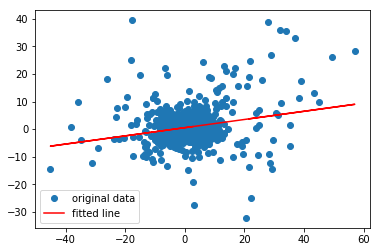

In [34]:
>>> plt.plot(x, y, 'o', label='original data')
>>> plt.plot(x, intercept + slope*x, 'r', label='fitted line')
>>> plt.legend()
>>> plt.show()